In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import datetime as dt
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
import talib

# Choose a Stock

In [2]:
yf.pdr_override()
stock = input("Enter a stock ticker symbol: ")
print(stock)

Enter a stock ticker symbol: SONY
SONY


# Choose a Start Date

In [3]:
now = dt.datetime.now()
startyear = 2024
startmonth = 13
startday = 0
while True:
    if startyear > now.year:
        startyear = int(input("Year: "))
        
    if startmonth > 12 or startmonth < 1:
        startmonth = int(input("Month: "))
        
    if startday > 31 or startday < 1:
        startday = int(input("Day: "))
        
    if (startyear <= now.year) and (startmonth <= 12 and  startmonth >= 1) and (startday <= 31 or startday >= 1):
        break
        
        

Year: 2019
Month: 11
Day: 4


In [4]:
try:
    start = dt.datetime(startyear,startmonth,startday)
    df = pdr.get_data_yahoo(stock, start, now)
except:
    print("Either the date or stock name is wrong. Please check")

[*********************100%***********************]  1 of 1 completed


## Sucessfully Imported!

## Simple Moving Average & Exponential Moving Average

In [5]:
smaUsed=[1,3,10,50,100,150,200]
for x in smaUsed:
    sma=x
    df["SMA_"+str(sma)]=round(df.iloc[:,4].rolling(window=sma).mean(),4)
emasUsed=[1,3,10,50,100,150,200]
for x in emasUsed:
    ema=x
    df["Ema_"+str(ema)]=round(df.iloc[:,4].ewm(span=ema, adjust=False).mean(),2)
df=df.iloc[200:]
df

,Open,High,Low,Close,Adj Close,Volume,SMA_1,SMA_3,SMA_10,SMA_50,SMA_100,SMA_150,SMA_200,Ema_1,Ema_3,Ema_10,Ema_50,Ema_100,Ema_150,Ema_200
Date,,,,,,,,,,,,,,,,,,,,
2020-08-20,79.070000,79.570000,78.870003,79.410004,79.410004,1224700,79.41,81.1633,81.269,75.4258,69.4240,67.7899,67.3175,79.41,80.71,81.14,76.03,71.99,69.86,68.52
2020-08-21,78.500000,78.930000,78.199997,78.750000,78.750000,1337000,78.75,79.7533,81.141,75.6534,69.6197,67.8317,67.4040,78.75,79.73,80.71,76.14,72.12,69.98,68.62
2020-08-24,79.910004,80.279999,79.370003,79.769997,79.769997,848500,79.77,79.3100,81.113,75.8830,69.8489,67.8827,67.4992,79.77,79.75,80.54,76.28,72.27,70.11,68.73
2020-08-25,79.180000,79.620003,79.160004,79.370003,79.370003,636000,79.37,79.2967,81.117,76.0758,70.0535,67.9293,67.5941,79.37,79.56,80.32,76.40,72.41,70.23,68.84
2020-08-26,80.400002,81.209999,80.139999,81.120003,81.120003,900600,81.12,80.0867,81.155,76.3112,70.2899,67.9861,67.6976,81.12,80.34,80.47,76.59,72.59,70.37,68.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-16,84.790001,85.470001,84.510002,85.400002,85.400002,485300,85.40,85.7100,83.956,83.9826,89.0272,89.7071,88.7915,85.40,85.39,84.49,85.15,86.83,87.30,87.50
2023-10-17,84.900002,86.379997,84.879997,85.709999,85.709999,424900,85.71,85.4200,84.406,83.8880,88.9420,89.7089,88.8366,85.71,85.55,84.71,85.17,86.81,87.28,87.48
2023-10-18,85.120003,85.290001,83.980003,84.099998,84.099998,385800,84.10,85.0700,84.634,83.7736,88.8326,89.7113,88.8757,84.10,84.83,84.60,85.13,86.76,87.24,87.45


## The Graph

Type in the SMA you want to see! Options: (1,3,10,50,100,150,200) 50
Type in the EMA you want to see! Options: (1,3,10,50,100,150,200) 100


(array([18506., 18628., 18748., 18871., 18993., 19113., 19236., 19358.,
        19478., 19601.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

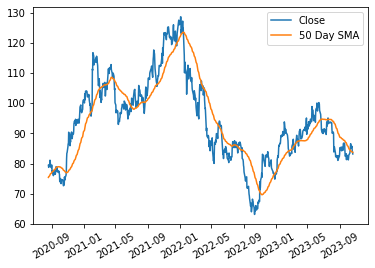

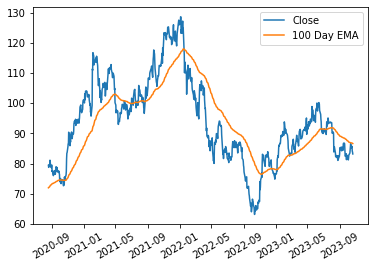

In [8]:
fig, ax = plt.subplots()
ax.plot(df["Close"], label = "Close")
sma_ob = input("Type in the SMA you want to see! Options: (1,3,10,50,100,150,200) ")
num = sma_ob
sma_ob = "SMA_" + sma_ob
ax.plot(df[sma_ob], label = f"{num} Day SMA")
ax.legend()
plt.xticks(rotation = 30)

fig, ax1 = plt.subplots()
ax1.plot(df["Close"], label = "Close")
ema_ob = input("Type in the EMA you want to see! Options: (1,3,10,50,100,150,200) ")
num = ema_ob
sma_ob = "Ema_" + ema_ob
ax1.plot(df[sma_ob], label = f"{num} Day EMA")
ax1.legend()
plt.xticks(rotation = 30)


## How to know which SMAs are used. If you are a long term investor, you should be inclined to look at the larger SMA's, such as 150, 200. If you are a day trader, 3 days would be fitting. 

## RSI  - "chart the current and historical strength or weakness of a stock or market based on the closing prices of a recent trading period."

## A stochastic oscillator - a momentum indicator comparing a particular closing price of a security to a range of its prices over a certain period of time

## EMAs are similar to SMAs. 

In [9]:
which_sma = input("Which SMA would you like to test? Options: (1,3,10,50,100,150,200): ")
latest_close = df['Close'][-1]
latest_sma = df[f"SMA_{which_sma}"][-1]
result = None

if latest_close > latest_sma:
    result = "Good buy right now"
else:
    result=  "Bad buy right now"

print()
if which_sma == str(1):
    print(f"Based on the {which_sma} day simple moving average, {stock} is a {result}.")
    
else:
    print(f"Based on the {which_sma} days simple moving average, {stock} is a {result}.")

which_ema = which_sma
latest_close = df['Close'][-1]
latest_ema = df[f"Ema_{which_ema}"][-1]
result = None

if latest_close > latest_ema:
    result = "Good buy right now"
else:
    result=  "Bad buy right now"

if which_ema == str(1):
    print(f"Based on the {which_ema} day exponential moving average, {stock} is a {result}.")
    
else:
    print(f"Based on the {which_ema} days exponential moving average, {stock} is a {result}.")
    
RSI_index = None
close_prices = df['Close'].values
rsi = talib.RSI(close_prices)
latest_rsi = rsi[-1]
if latest_rsi < 30:
    RSI_index =  "Good buy right now"
elif latest_rsi > 70:
    RSI_index = "Bad buy right now"
else:
    RSI_index =  "Neutral"
print(f"Based on the RSI, {stock} is a {RSI_index}.")




sto = None 

high_prices = df['High'].values
low_prices = df['Low'].values
close_prices = df['Close'].values
slowk, slowd = talib.STOCH(high_prices, low_prices, close_prices)

latest_slowk = slowk[-1]
latest_slowd = slowd[-1]

if latest_slowk < 20 and latest_slowd < 20:
    sto = "Good buy right now"
elif latest_slowk > 80 and latest_slowd > 80:
    sto = "Bad buy right now"
else:
    sto =  "Neutral"


print(f"Based on the Stochastic Oscillator, {stock} is a {result}.")

Which SMA would you like to test? Options: (1,3,10,50,100,150,200): 50

Based on the 50 days simple moving average, SONY is a Bad buy right now.
Based on the 50 days exponential moving average, SONY is a Bad buy right now.
Based on the RSI, SONY is a Neutral.
Based on the Stochastic Oscillator, SONY is a Bad buy right now.


## ALL TOGETHER:
## More Advanced Testing with Simple Moving Average and RSI with the Mark Minervini conditions. If every condition is met, the stock is on a bull run and should be bought. 


In [12]:
currentClose=df["Adj Close"][-1]
moving_average_1=df["SMA_1"][-1]
moving_average_3=df["SMA_3"][-1]
moving_average_10=df["SMA_10"][-1]
moving_average_50=df["SMA_50"][-1]
moving_average_100=df["SMA_50"][-1]
moving_average_150=df["SMA_150"][-1]
moving_average_200=df["SMA_200"][-1]
low_of_52week=min(df["Adj Close"][-260:])
high_of_52week=max(df["Adj Close"][-260:])
RS_Rating= latest_rsi
try:
    moving_average_200_20 = df["SMA_200"][-20]

except Exception:
    moving_average_200_20=0


#Condition 1: Current Price > 150 SMA and > 200 SMA
if(currentClose>moving_average_150>moving_average_200):
    cond_1=True
    print("Condition 1 met")
else:
    cond_1=False
    print("Condition 1 not met")
#Condition 2: 150 SMA and > 200 SMA
if(moving_average_150>moving_average_200):
    cond_2=True
    print("Condition 2 met")
else:
    cond_2=False
    print("Condition 2 not met")
#Condition 3: 200 SMA trending up for at least 1 month (ideally 4-5 months)
if(moving_average_200>moving_average_200_20):
    cond_3=True
    print("Condition 3 met")
else:
    cond_3=False
    print("Condition 3 not met")
#Condition 4: 50 SMA> 150 SMA and 50 SMA> 200 SMA
if(moving_average_50>moving_average_150>moving_average_200):
    #print("Condition 4 met")
    cond_4=True
    print("Condition 4 met")
else:
    #print("Condition 4 not met")
    cond_4=False
    print("Condition 4 not met")
#Condition 5: Current Price > 50 SMA
if(currentClose>moving_average_50):
    cond_5=True
    print("Condition 5 met")
else:
    cond_5=False
    print("Condition 5 not met")
#Condition 6: Current Price is at least 30% above 52 week low (Many of the best are up 100-300% before coming out of consolidation)
if(currentClose>=(1.3*low_of_52week)):
    cond_6=True
    print("Condition 6 met")
else:
    cond_6=False
    print("Condition 6 not met")
#Condition 7: Current Price is within 25% of 52 week high
if(currentClose>=(.75*high_of_52week)):
    cond_7=True
    print("Condition 7 met")
else:
    cond_7=False
    print("Condition 7 not met")
#Condition 8: IBD RS rating >70 and the higher the better
if(int(latest_rsi) >70):
    cond_8=True
    print("Condition 8 met")
else:
    cond_8=False
    print("Condition 8 not met")

if(cond_1 and cond_2 and cond_3 and cond_4 and cond_5 and cond_6 and cond_7 and cond_8):
    print(f"{stock} met all conditions. SONY is a Good buy right now.")
else:
    print(f"{stock} did not meet the conditions. SONY is a Bad buy right now.")
    

Condition 1 not met
Condition 2 met
Condition 3 met
Condition 4 not met
Condition 5 not met
Condition 6 met
Condition 7 met
Condition 8 not met
SONY did not meet the conditions. SONY is a Bad buy right now.
